In [1]:
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

## Load Data

In [2]:
data_folder = '../data/'

train_file = 'train.csv'
test_file = 'test.csv'

train_path = data_folder + train_file
test_path = data_folder + test_file

In [3]:
df_train = pd.read_csv(train_path).rename(columns={'KPI ID': 'kpi_id'})
print(df_train.shape)
df_train.head(2)

(2476315, 4)


,timestamp,value,label,kpi_id
0,1493568000,1.901639,0,02e99bd4f6cfb33f
1,1493568060,1.786885,0,02e99bd4f6cfb33f


In [4]:
df_test = pd.read_csv(test_path).rename(columns={'KPI ID': 'kpi_id'})
print(df_test.shape)
df_test.head(2)

(2345211, 3)


,timestamp,value,kpi_id
0,1501475700,2.719298,02e99bd4f6cfb33f
1,1501475760,2.456140,02e99bd4f6cfb33f


In [5]:
df_train['datetime'] = pd.to_datetime(df_train.timestamp, unit='s')
df_test['datetime'] = pd.to_datetime(df_test.timestamp, unit='s')

## Exploration

KPI: The KPIs are the time series data with the format of (timestamp, value).

In [6]:
set(df_train.kpi_id.unique()) == set(df_test.kpi_id.unique())

True

### KPI ID

KPI ID denotes the name of 26 KPIs.

In [7]:
df_test.groupby('kpi_id').count().min()

timestamp    8248
value        8248
datetime     8248
dtype: int64

### Value

Plot 5 KPIs


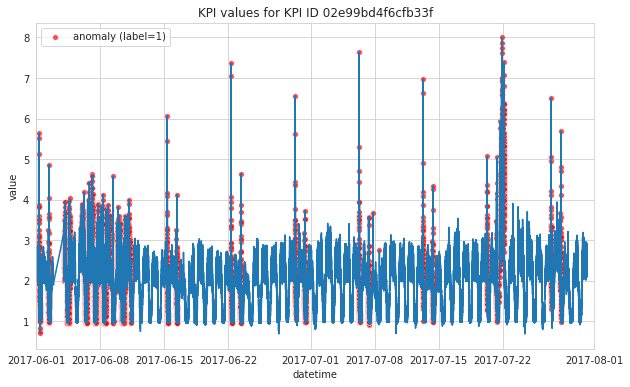

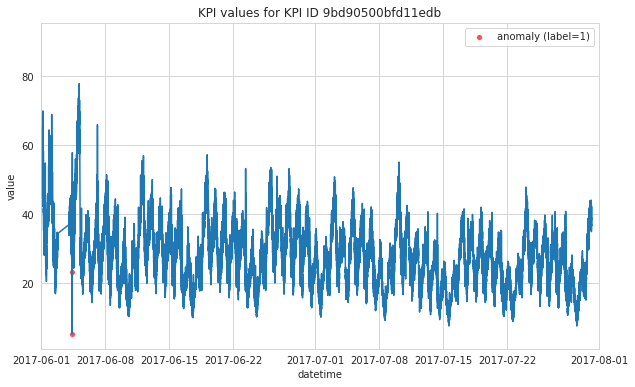

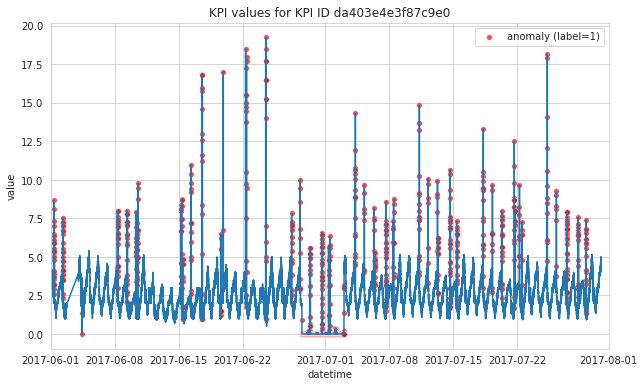

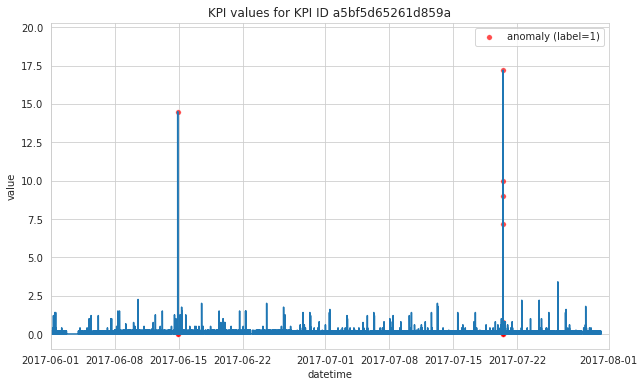

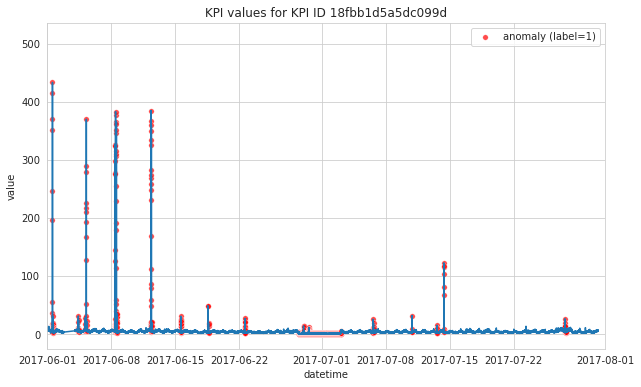

In [18]:
nb_max_to_plot = 5
import datetime

print(f'Plot {nb_max_to_plot} KPIs')

for kpi_id in df_train.kpi_id.unique()[:nb_max_to_plot]:
    data = df_train[df_train.kpi_id == kpi_id]
    sns.lineplot(data=data, x='datetime', y='value', figure=plt.figure(figsize=(10, 6)))
    plt.title(f'KPI values for KPI ID {kpi_id}')
    sns.scatterplot(data=data[data.label == 1], x='datetime', y='value', color='r', s=30, alpha=.7, label='anomaly (label=1)')
    plt.xlim(datetime.datetime(2017, 6, 1), datetime.datetime(2017, 8, 1))
    plt.legend()
    plt.show()

DEBUG:data_factory.preprocessing:Fill grp 02e99bd4f6cfb33f. shape: (128562, 6)
DEBUG:data_factory.preprocessing:Fill grp 02e99bd4f6cfb33f Done. shape: (131795, 5)
DEBUG:data_factory.preprocessing:Fill grp 046ec29ddf80d62e. shape: (8784, 6)
DEBUG:data_factory.preprocessing:Fill grp 046ec29ddf80d62e Done. shape: (43916, 5)
DEBUG:data_factory.preprocessing:Fill grp 07927a9a18fa19ae. shape: (10960, 6)
DEBUG:data_factory.preprocessing:Fill grp 07927a9a18fa19ae Done. shape: (61471, 5)
DEBUG:data_factory.preprocessing:Fill grp 09513ae3e75778a3. shape: (128971, 6)
DEBUG:data_factory.preprocessing:Fill grp 09513ae3e75778a3 Done. shape: (131785, 5)
DEBUG:data_factory.preprocessing:Fill grp 18fbb1d5a5dc099d. shape: (129128, 6)
DEBUG:data_factory.preprocessing:Fill grp 18fbb1d5a5dc099d Done. shape: (131795, 5)
DEBUG:data_factory.preprocessing:Fill grp 1c35dbf57f55f5e4. shape: (128853, 6)
DEBUG:data_factory.preprocessing:Fill grp 1c35dbf57f55f5e4 Done. shape: (131795, 5)
DEBUG:data_factory.preproce

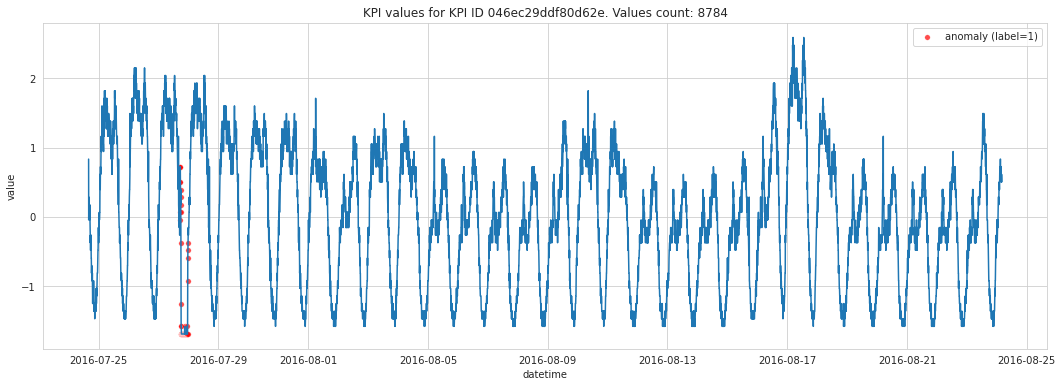

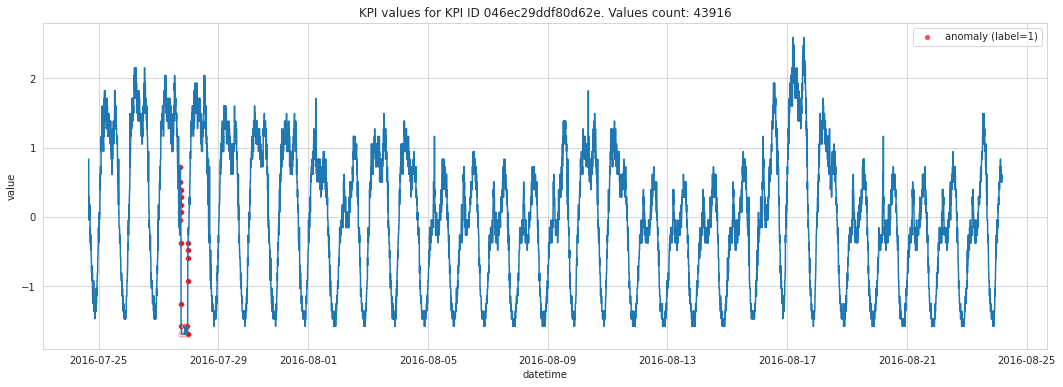

In [9]:
from data_factory.preprocessing import *

df_train_filled = fill_missing_dates(df_train, date_col='datetime', timestamp_col='timestamp', grp_col='kpi_id')

for kpi_id in ['046ec29ddf80d62e']:
    data = df_train[df_train.kpi_id == kpi_id]
    sns.lineplot(data=data, x='datetime', y='value', figure=plt.figure(figsize=(18, 6)))
    plt.title(f'KPI values for KPI ID {kpi_id}. Values count: {data.shape[0]}')
    sns.scatterplot(data=data[data.label == 1], x='datetime', y='value', color='r', s=30, alpha=.7, label='anomaly (label=1)')
    plt.legend()
    plt.show()

    data = df_train_filled[df_train_filled.kpi_id == kpi_id]
    sns.lineplot(data=data, x='datetime', y='value', figure=plt.figure(figsize=(18, 6)))
    plt.title(f'KPI values for KPI ID {kpi_id}. Values count: {data.shape[0]}')
    sns.scatterplot(data=data[data.label == 1], x='datetime', y='value', color='r', s=30, alpha=.7, label='anomaly (label=1)')
    plt.legend()
    plt.show()

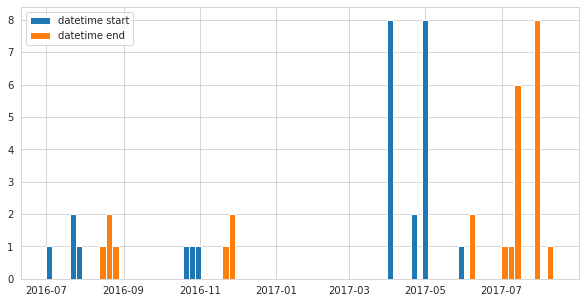

In [10]:
dates = df_train.groupby('kpi_id').datetime.agg(['min', 'max']).rename(columns={'min': 'datetime_min', 'max': 'datetime_max'})
fig = plt.figure(figsize=(10, 5))
dates.datetime_min.hist(label='datetime start', bins=70, figure=fig)
dates.datetime_max.hist(label='datetime end', bins=70, figure=fig)
plt.legend()
plt.show()

KPIs have different start and end points.

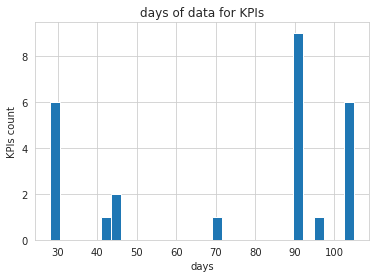

In [20]:
dates['duration'] = (dates.datetime_max - dates.datetime_min).dt.days
dates.duration.hist(bins=30)
plt.title('days of data for KPIs')
plt.xlabel('days')
plt.ylabel('KPIs count')
plt.show()